# Part 3: Naive Bayes

## Preprocessing

In [1]:
import pandas as pd
import nltk
import os
import re
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_train = pd.DataFrame(columns=['words', 'sentiment'])
df_test = pd.DataFrame(columns=['words', 'sentiment'])

In [3]:
sw_dir = '../dataset/sw.txt'
stop_words = []
with open(sw_dir) as f:
    text = f.readlines()
    for word in text:
        stop_words.append(re.findall('\S+', word)[0])

# adding br and empty string to stop words
stop_words.append('br')
stop_words.append('')

In [4]:
# create dataset from text files
train_pos_dir = '../dataset/train/pos'
for filename in os.listdir(train_pos_dir):
    with open(os.path.join(train_pos_dir, filename)) as f:
        text = f.readlines()[0]
        df_train = df_train.append({'words': text, 'sentiment': 1},
                                   ignore_index=True)

train_neg_dir = '../dataset/train/neg'
for filename in os.listdir(train_neg_dir):
    with open(os.path.join(train_neg_dir, filename)) as f:
        text = f.readlines()[0]
        df_train = df_train.append({'words': text, 'sentiment': 0},
                                   ignore_index=True)

test_pos_dir = '../dataset/test/pos'
for filename in os.listdir(test_pos_dir):
    with open(os.path.join(test_pos_dir, filename)) as f:
        text = f.readlines()[0]
        df_test = df_test.append({'words': text, 'sentiment': 1},
                                   ignore_index=True)

test_neg_dir = '../dataset/test/neg'
for filename in os.listdir(test_neg_dir):
    with open(os.path.join(test_neg_dir, filename)) as f:
        text = f.readlines()[0]
        df_test = df_test.append({'words': text, 'sentiment': 0},
                                   ignore_index=True)

In [5]:
def remove_punct(text):
    
    def change(ch):
        if ch in string.punctuation or ch.isdigit():
            return " "
        else:
            return ch
    
    no_punct = "".join([change(ch) for ch in text])
    return no_punct

# df_train['words'] = df_train['words'].apply(lambda x: remove_punct(x))


In [6]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

# df_train['words'] = df_train['words'].apply(lambda x: tokenize(x.lower()))


In [7]:
def remove_sw(tokens):
    text = [w for w in tokens if w not in stop_words]
    return text

# df_train['words'] = df_train['words'].apply(lambda x: /remove_sw(x))

In [8]:
def remove_short(tokens):
    text = [w for w in tokens if len(w)>2]
    return text

# df_train['words'] = df_train['words'].apply(lambda x: remove_short(x))

There are several ways to get root of tokens like stemming and lemmatizing. stemming is faster and lemmatizing is more precise.

In [9]:
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokens):
    text = [wn.lemmatize(w) for w in tokens]
    return text

# df_train['words'] = df_train['words'].apply(lambda x: lemmatizing(x))

In [10]:
def clean_text(text):
    text = remove_punct(text)
    text = tokenize(text)
    text = remove_sw(text)
    text = remove_short(text)
    text = lemmatizing(text)
    return text

count_vect = CountVectorizer(analyzer=clean_text,
                             lowercase=True,
                             binary=True)
X_train = count_vect.fit_transform(df_train['words'])
y_train = df_train['sentiment'].to_numpy(dtype='int')

X_test = count_vect.transform(df_test['words'])
y_test = df_train['sentiment'].to_numpy(dtype='int')
# print(count_vect.get_feature_names())

## Classification

In [18]:
clf = MultinomialNB(alpha=100)
clf = clf.fit(X_train, y_train)

In [19]:
# clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

acc_tr = clf.score(X_train, y_train)
acc_te = clf.score(X_test, y_test)

print("train accuracy: {}%".format(acc_tr*100))
print("test accuracy: {}%".format(acc_te*100))

train accuracy: 86.8%
test accuracy: 84.652%


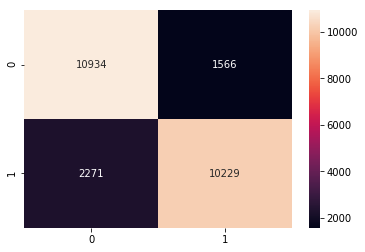

In [20]:
sns.heatmap(cm, annot=True, fmt='d')

## Laplace smoothing

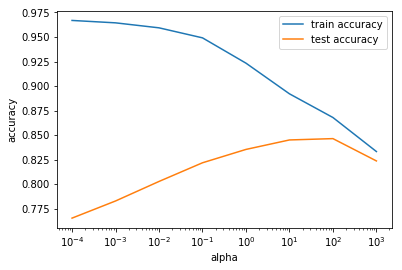

In [17]:
alphas = [10**x for x in range(-4, 4)]

accs_tr = []
accs_te = []

for alpha in alphas:
    cls = MultinomialNB(alpha=alpha)
    cls = cls.fit(X_train, y_train)
    accs_tr.append(cls.score(X_train, y_train))
    accs_te.append(cls.score(X_test, y_test))
    
plt.plot(alphas, accs_tr)
plt.plot(alphas, accs_te)
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.legend(['train accuracy', 'test accuracy'])
plt.xscale('log')